In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

%matplotlib inline

# Data Load

In [64]:
# 와인 데이터 로드
wine = load_wine()
# feature 데이터 로드
x_data = wine.data
# target 데이터 로드
y_data = wine.target
# wine 데이터의 feature를 DataFrame으로 생성
df = pd.DataFrame(data=x_data, columns=[wine.feature_names])
# df_wine 데이터프레임에 target컬럼 생성
df['target'] = wine.target

# 데이터 살펴보기

In [117]:
load_wine?

Signature: load_wine(*, return_X_y=False, as_frame=False)
Docstring:
Load and return the wine dataset (classification).

.. versionadded:: 0.18

The wine dataset is a classic and very easy multi-class classification
dataset.

=================   ==============
Classes                          3
Samples per class        [59,71,48]
Samples total                  178
Dimensionality                  13
Features            real, positive
=================   ==============

The copy of UCI ML Wine Data Set dataset is downloaded and modified to fit
standard format from:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

Read more in the :ref:`User Guide <wine_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

as_frame : bool, default=False
    If True, the data is a pandas DataFrame including columns with
    approp

In [98]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [106]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [65]:
df.shape

(178, 14)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   (alcohol,)                       178 non-null    float64
 1   (malic_acid,)                    178 non-null    float64
 2   (ash,)                           178 non-null    float64
 3   (alcalinity_of_ash,)             178 non-null    float64
 4   (magnesium,)                     178 non-null    float64
 5   (total_phenols,)                 178 non-null    float64
 6   (flavanoids,)                    178 non-null    float64
 7   (nonflavanoid_phenols,)          178 non-null    float64
 8   (proanthocyanins,)               178 non-null    float64
 9   (color_intensity,)               178 non-null    float64
 10  (hue,)                           178 non-null    float64
 11  (od280/od315_of_diluted_wines,)  178 non-null    float64
 12  (proline,)            

In [66]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [69]:
df.iloc[:, -1].value_counts()

1    71
0    59
2    48
Name: (target,), dtype: int64

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

# EDA

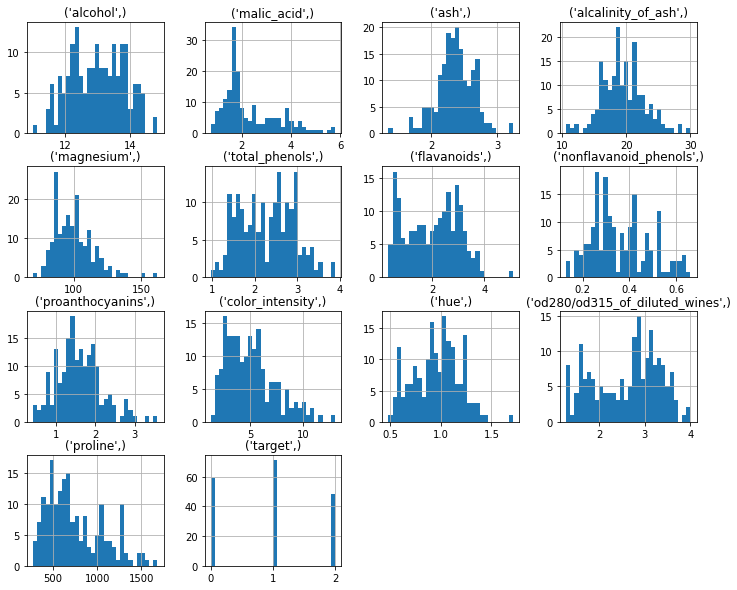

In [95]:
df.hist(figsize=(12, 10), bins=30);

# 모델 훈련

In [74]:
model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=None, min_samples_split=2, min_samples_leaf=1, max_features=None)
model

DecisionTreeClassifier()

In [75]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [88]:
from sklearn import metrics

y_predict = model.predict(x_train)
score = metrics.accuracy_score(y_train, y_predict)
score

1.0

In [89]:
y_predict = model.predict(x_test)
score = metrics.accuracy_score(y_test, y_predict)
score

0.9444444444444444

# 모델 평가

In [96]:
print(metrics.classification_report(y_test, y_predict, target_names=wine.target_names))
print(metrics.confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

     class_0       0.94      0.94      0.94        18
     class_1       0.95      0.91      0.93        22
     class_2       0.93      1.00      0.97        14

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54

[[17  1  0]
 [ 1 20  1]
 [ 0  0 14]]
